### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient = pd.read_csv('Patient 328_data.csv')

In [3]:
patient.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,...,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000
mean,0.041801,0.157649,0.503983,1.612826,1.752605,5.945839,1.596091,1.124106,1.012596,1.008137,...,1.633177,1.910179,1.956635,1.769240,0.933984,1.356577,1.951661,1.947824,1.927628,37.360121
std,0.012791,0.015030,0.029775,0.021044,0.017030,3.738041,0.345469,0.034964,0.006373,0.005512,...,0.031975,0.019590,0.037374,0.023402,0.058273,0.028610,0.026580,0.008612,0.021987,20.491199
min,0.014056,0.130004,0.443821,1.546149,1.579715,2.182656,1.269842,1.066477,0.969971,0.963339,...,1.531839,1.874152,1.832738,1.698182,0.574881,1.275213,1.894666,1.928014,1.893607,15.700000
25%,0.033784,0.148566,0.481535,1.596618,1.739546,3.622881,1.393944,1.098553,1.006505,1.001897,...,1.613500,1.894903,1.949314,1.756053,0.913021,1.336867,1.932452,1.942210,1.913480,24.400000
50%,0.042463,0.155926,0.494992,1.606824,1.748565,5.132266,1.466340,1.119421,1.013758,1.008920,...,1.638148,1.906388,1.968608,1.771787,0.946469,1.358981,1.943352,1.946587,1.923073,29.100000
75%,0.047815,0.161591,0.518666,1.627494,1.768348,7.121791,1.636319,1.151575,1.017741,1.012455,...,1.657493,1.923467,1.979637,1.785465,0.971003,1.377659,1.975593,1.950790,1.931454,43.900000
max,0.093561,0.223820,0.594528,1.656576,1.791442,29.809904,2.952590,1.258484,1.052960,1.067263,...,1.725813,1.972112,2.004841,1.828357,1.045375,1.441744,2.014832,1.977377,1.996065,97.700000


In [4]:
X=patient.drop('BIS', axis=1)
y= patient['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

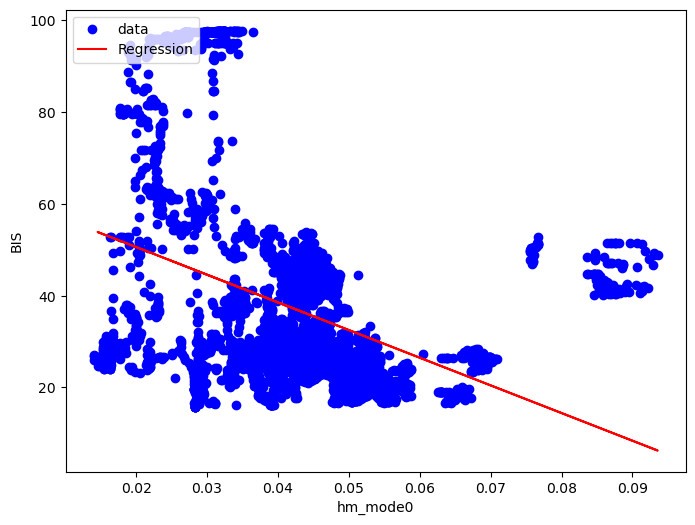

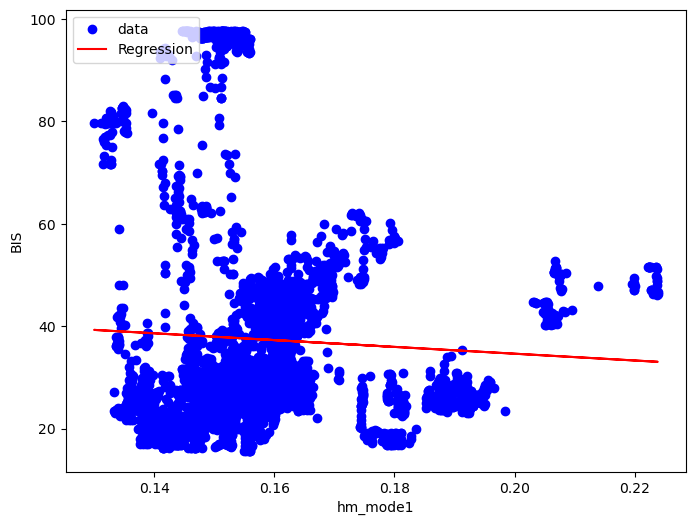

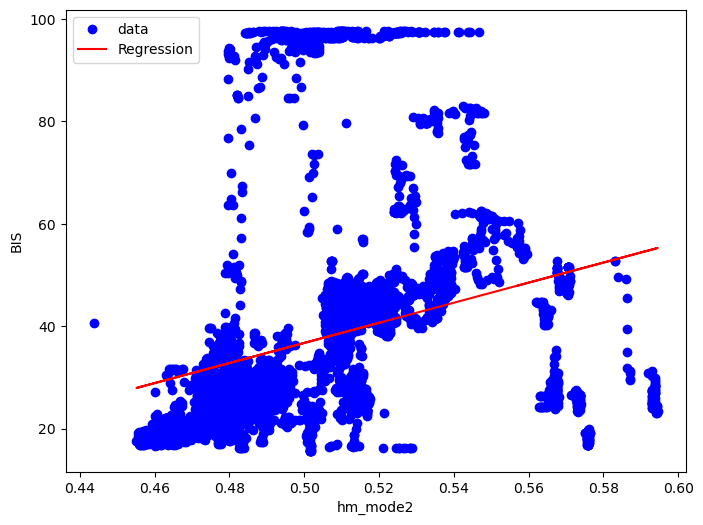

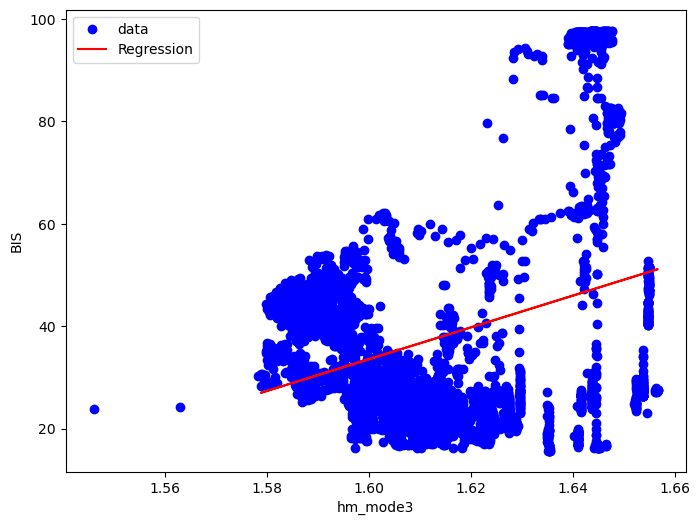

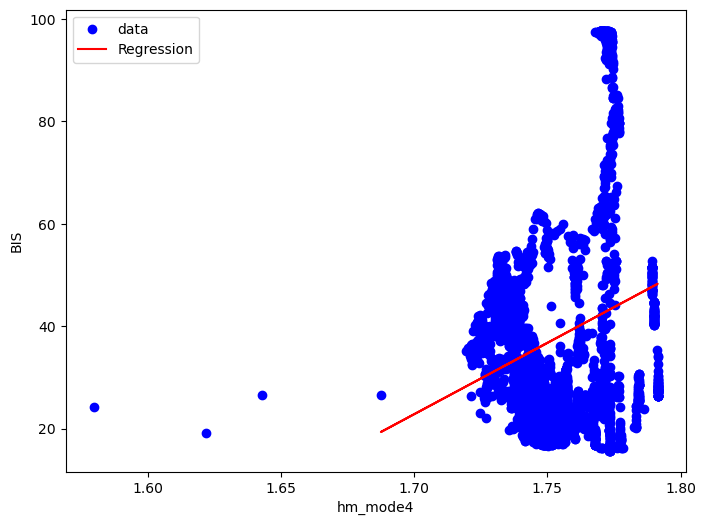

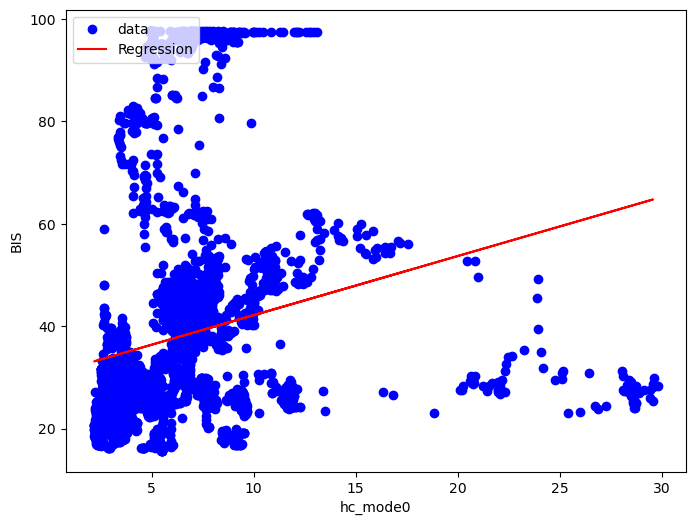

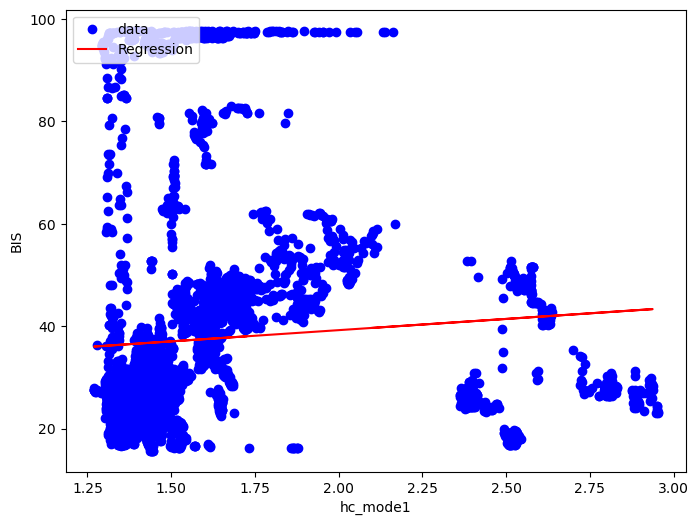

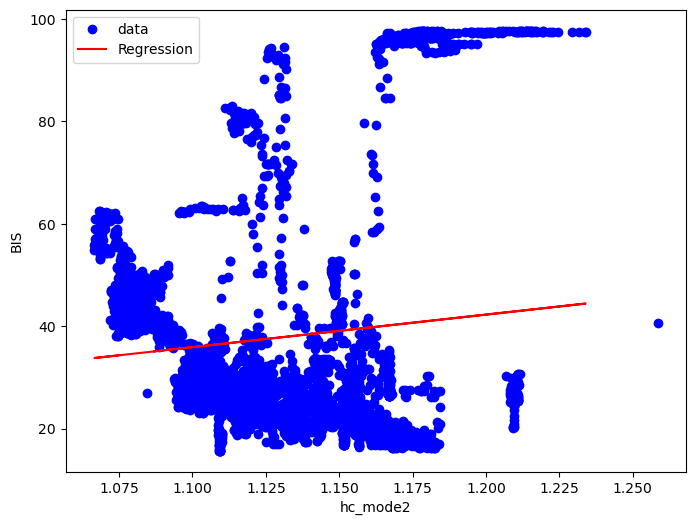

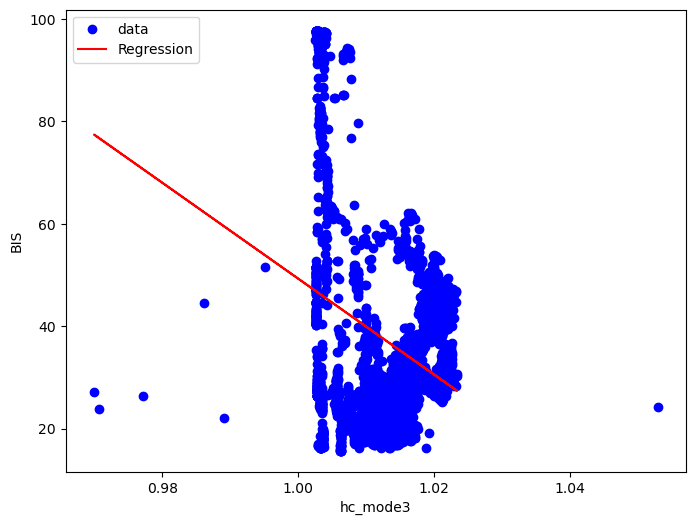

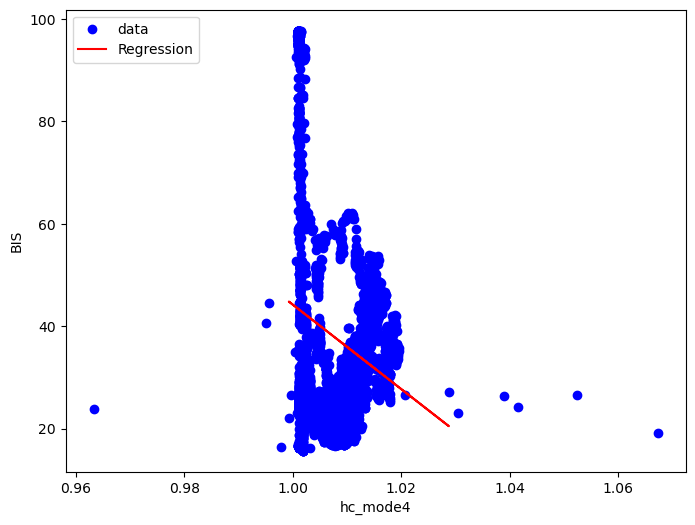

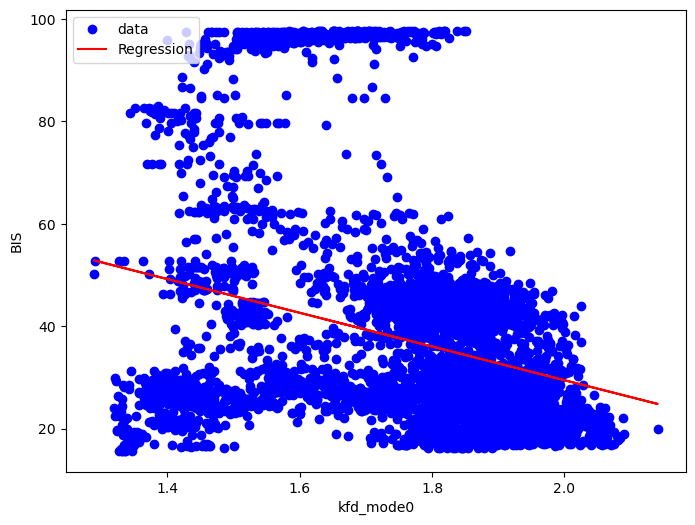

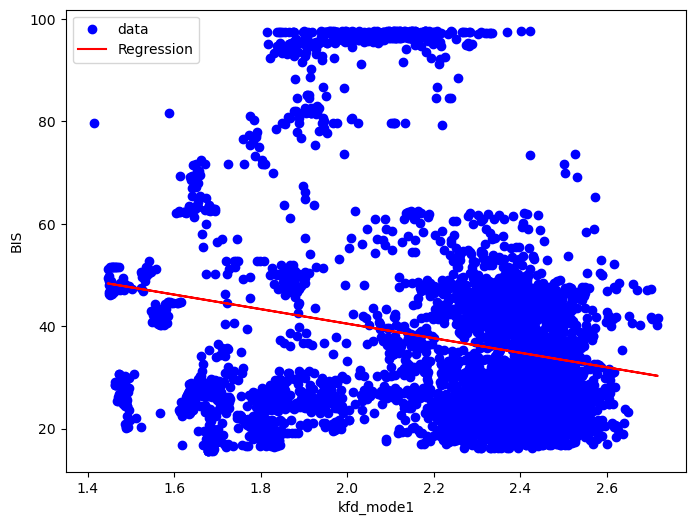

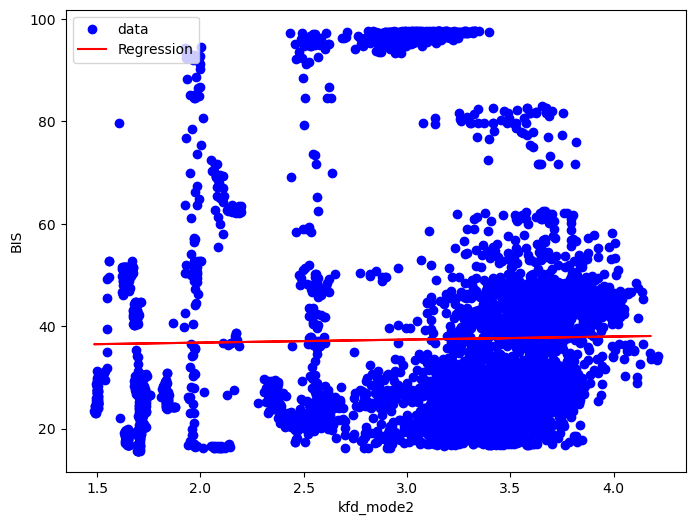

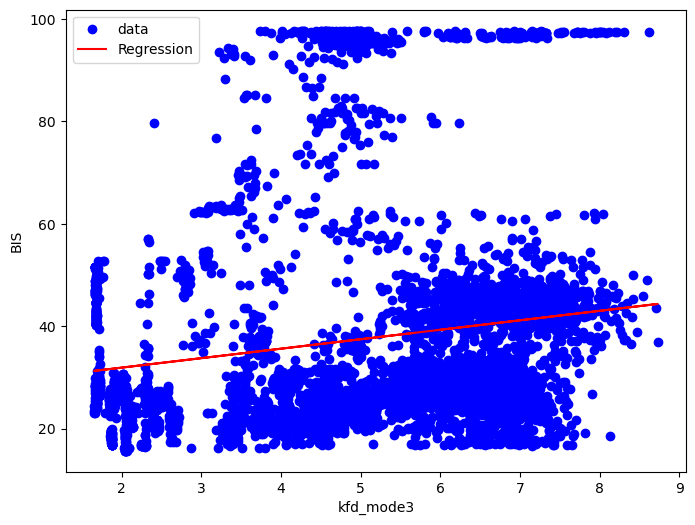

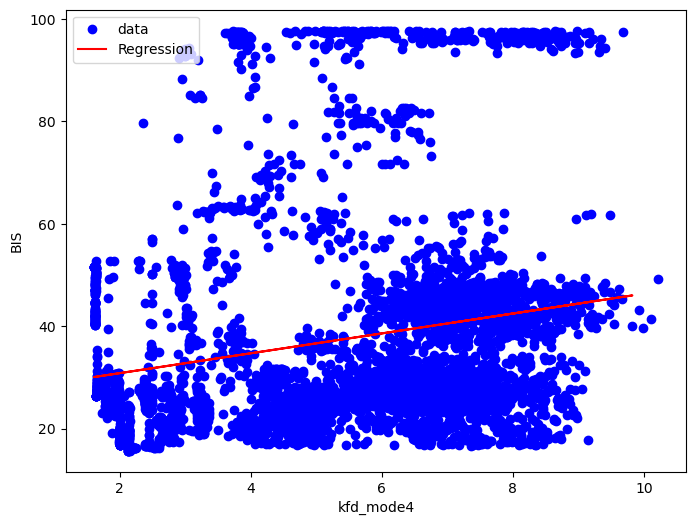

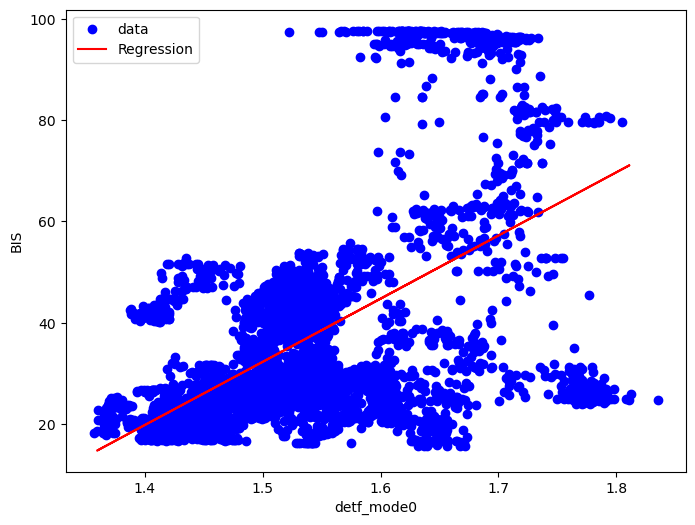

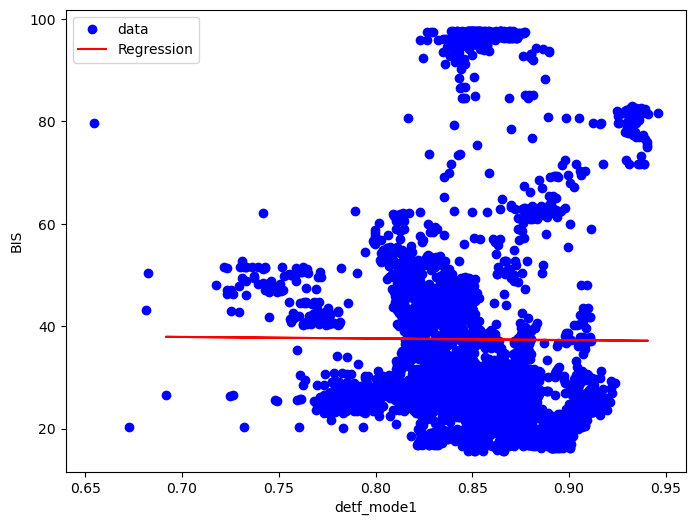

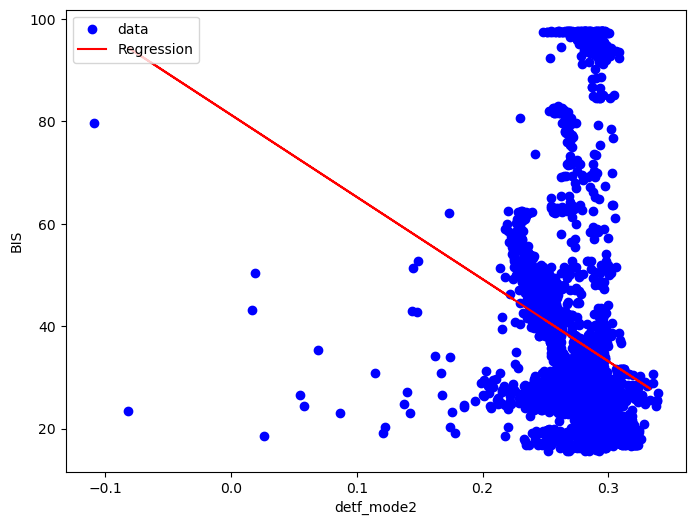

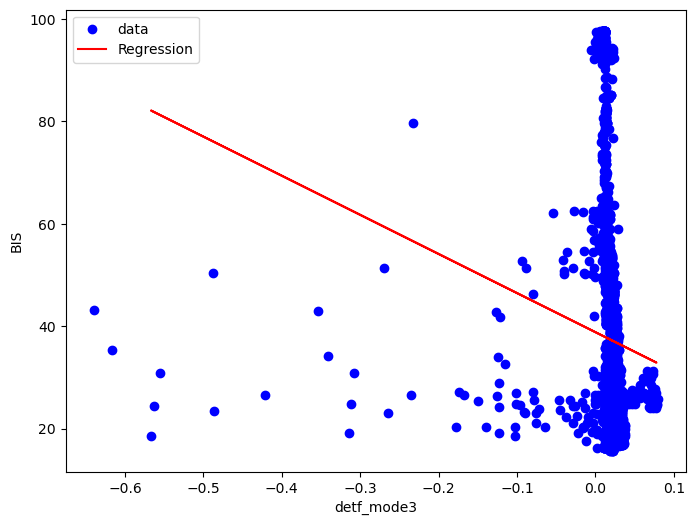

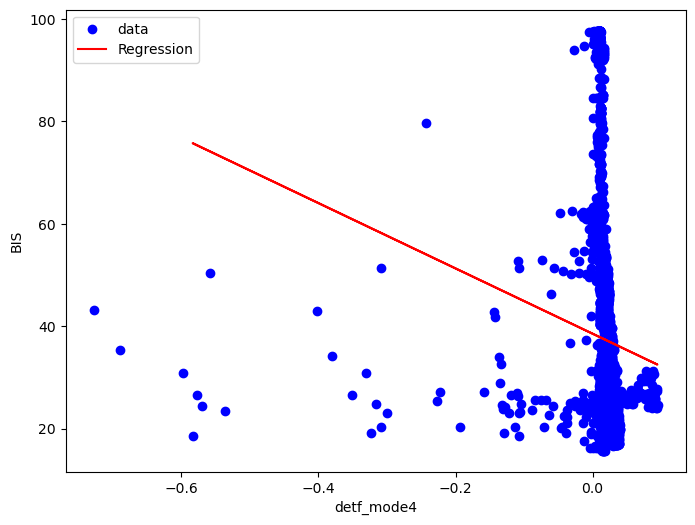

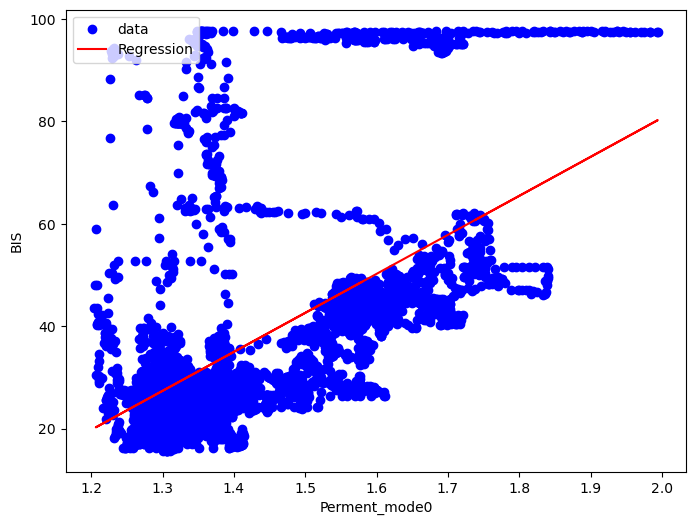

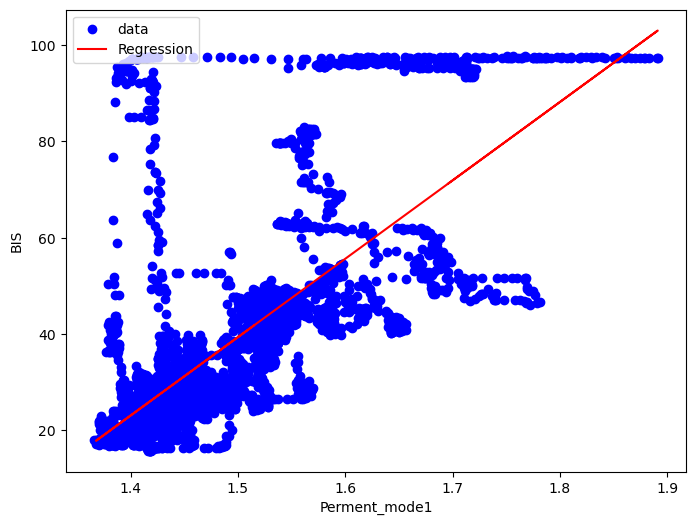

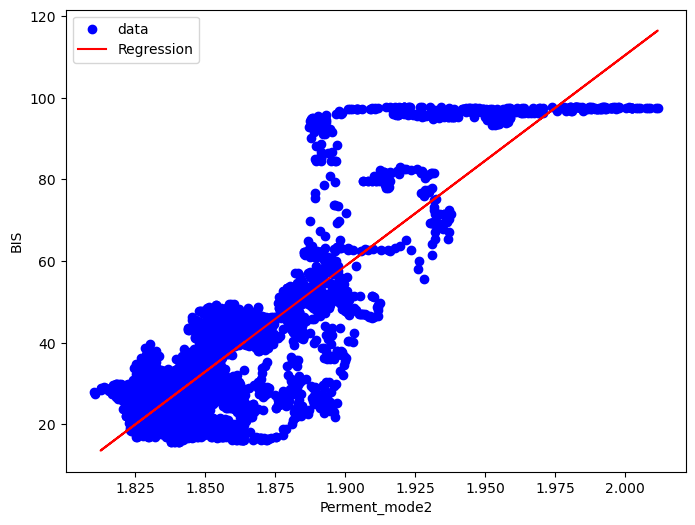

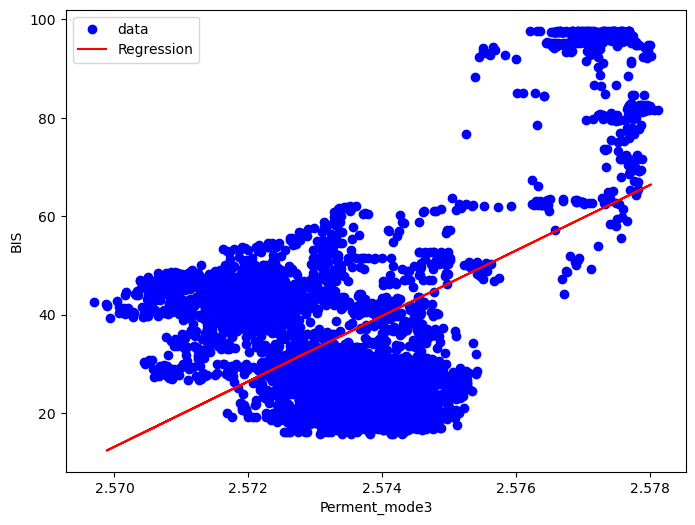

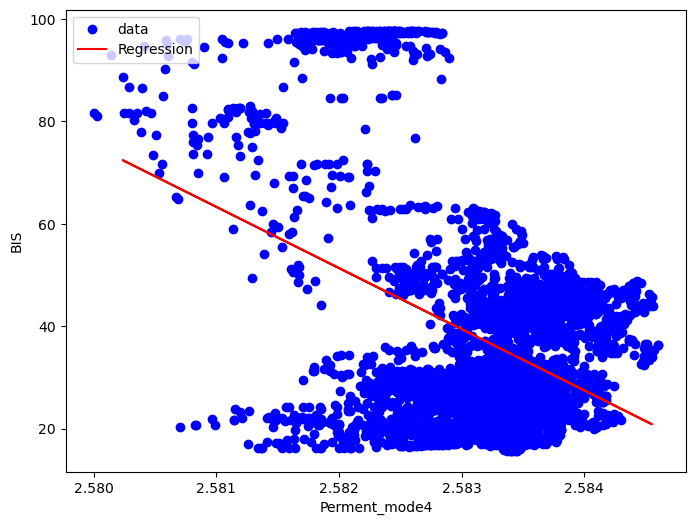

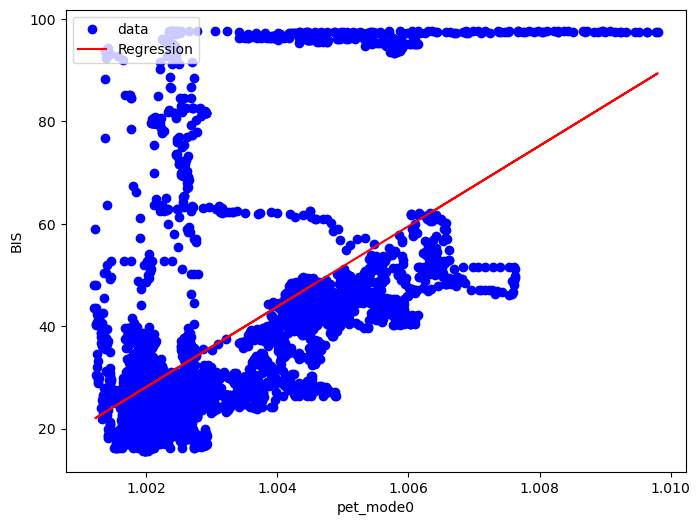

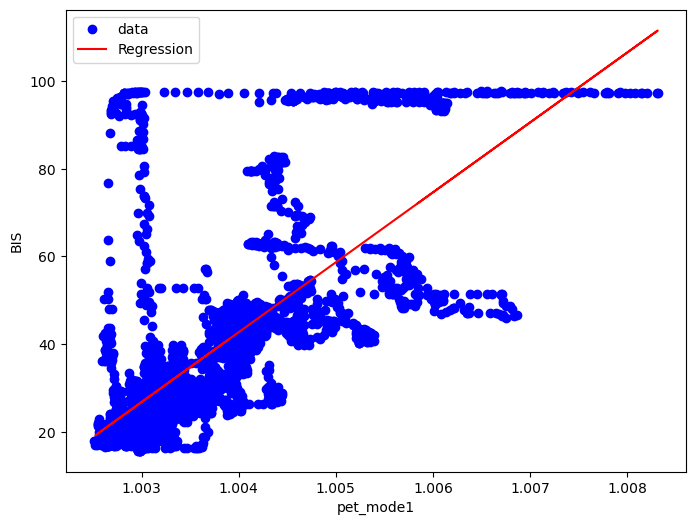

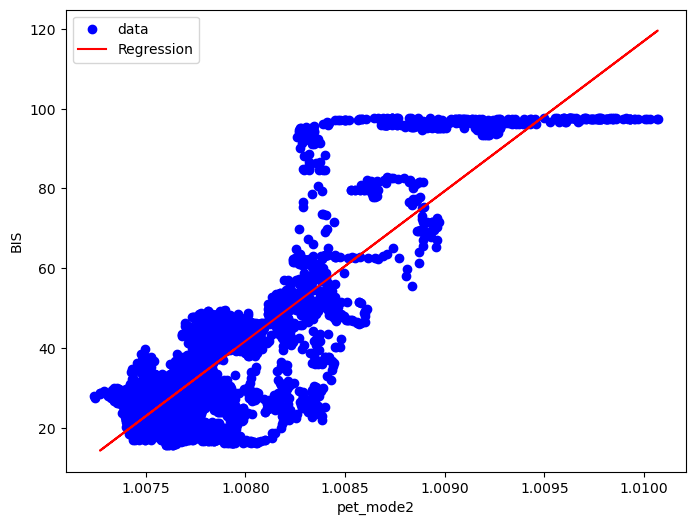

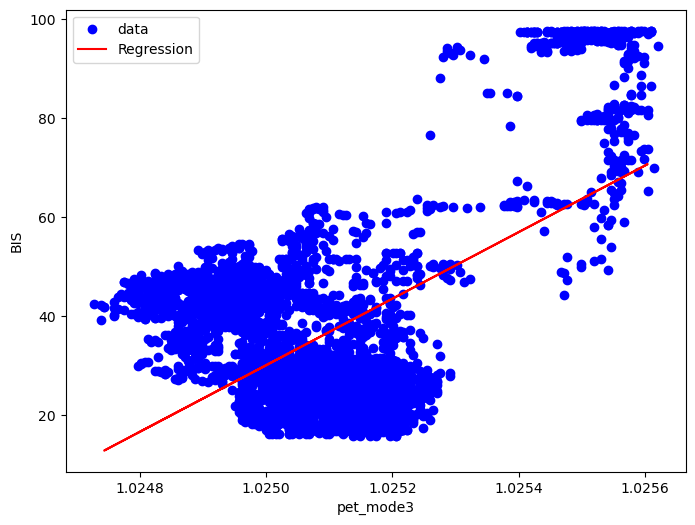

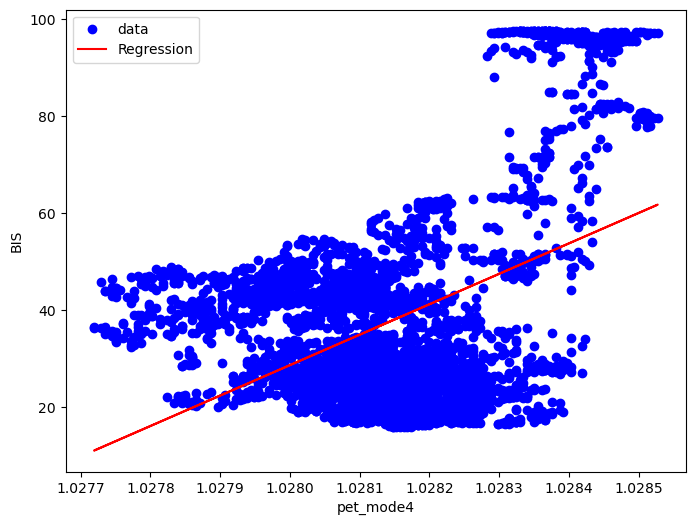

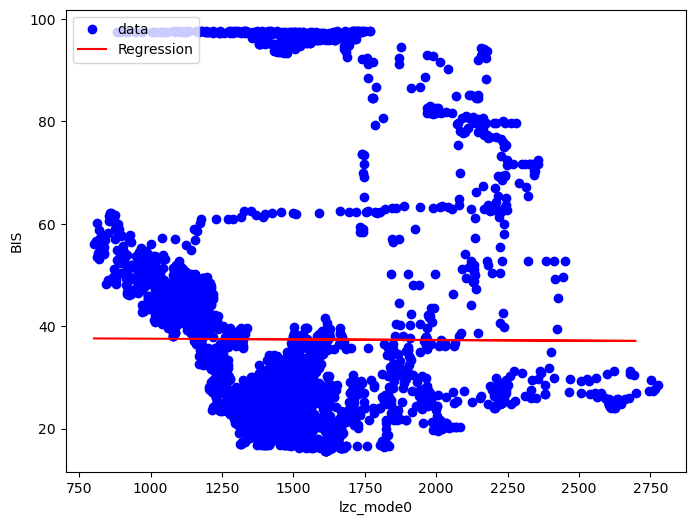

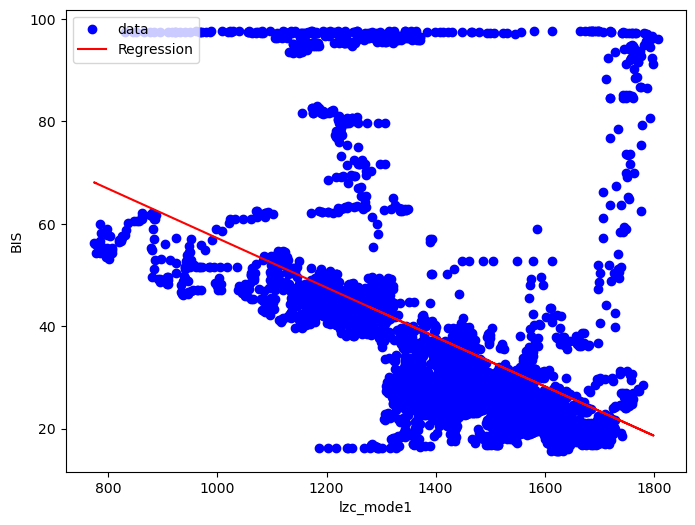

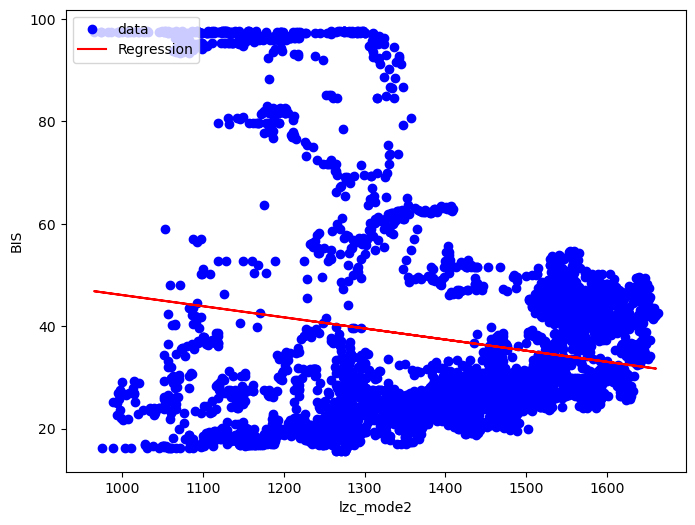

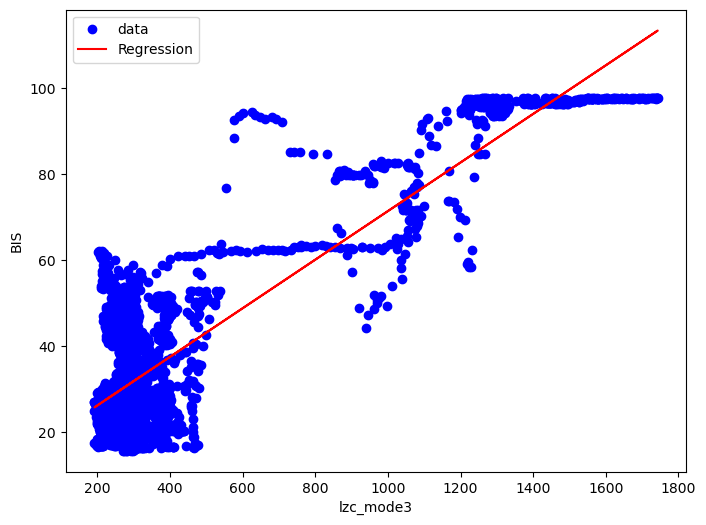

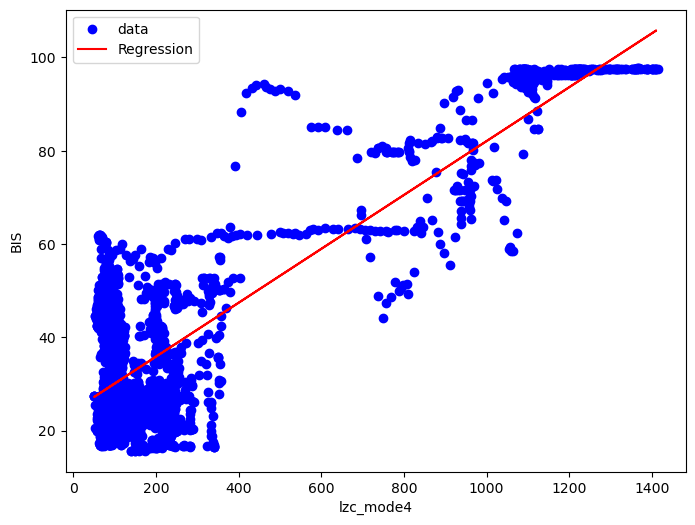

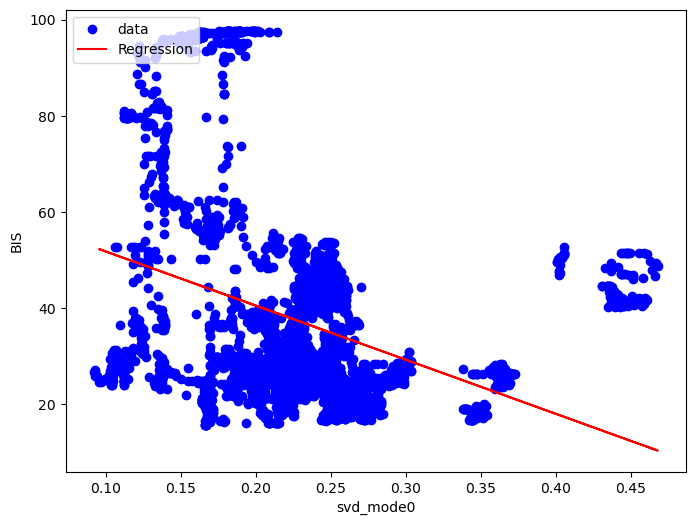

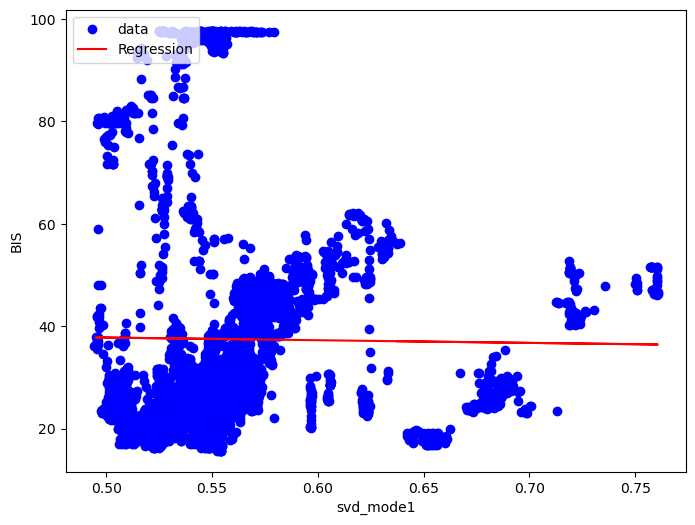

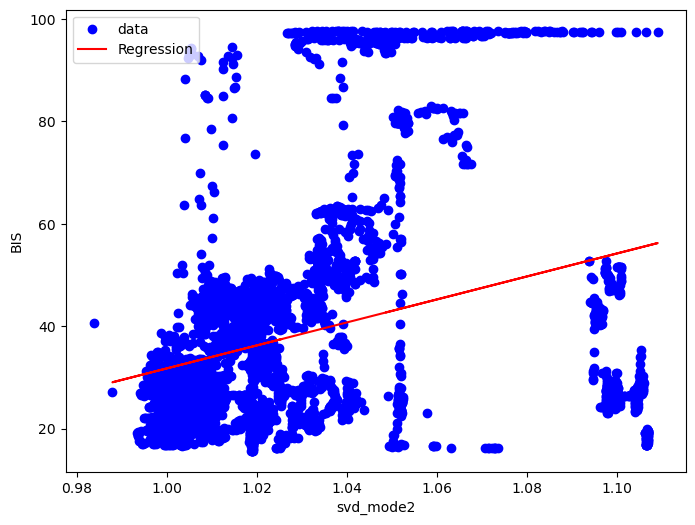

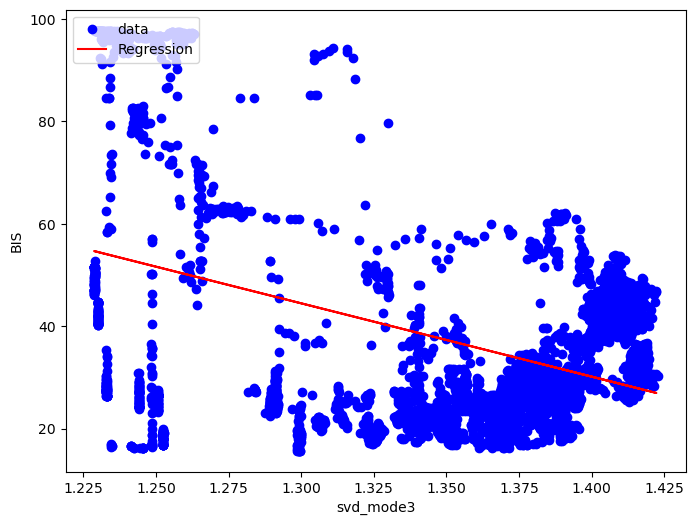

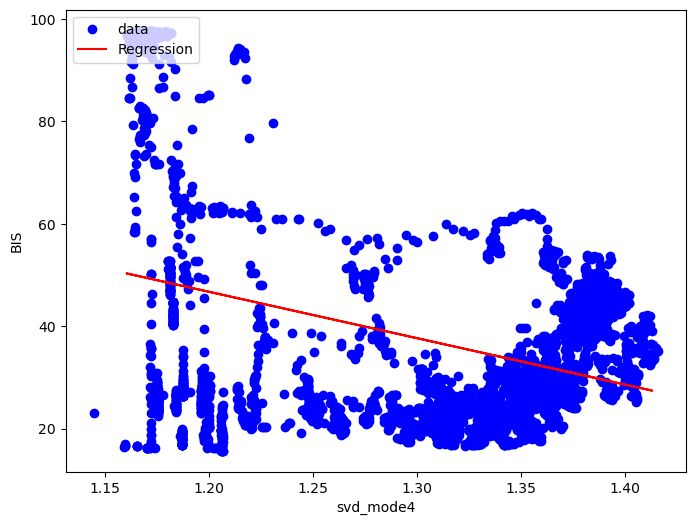

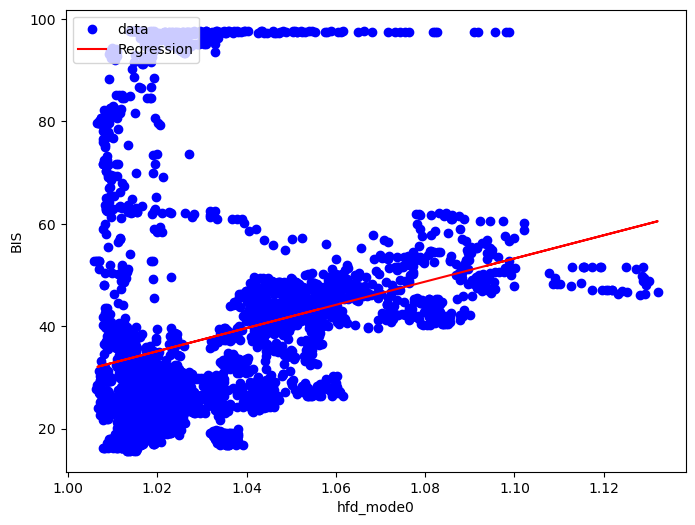

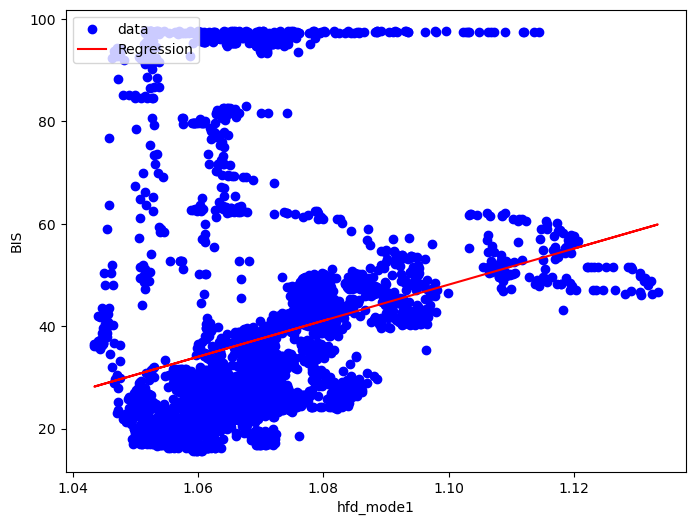

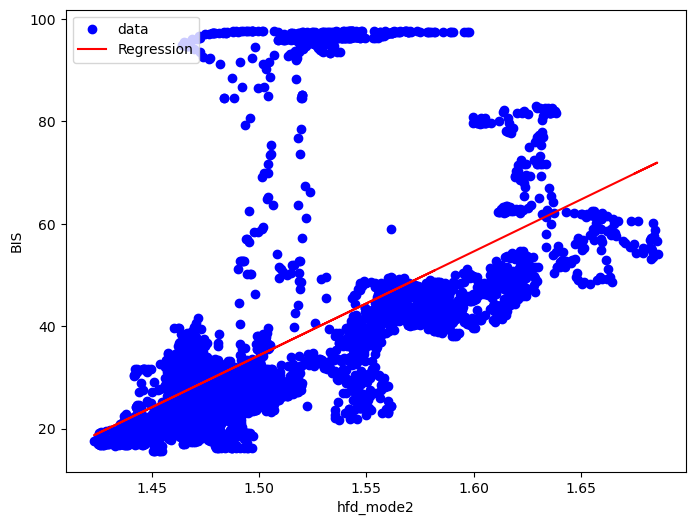

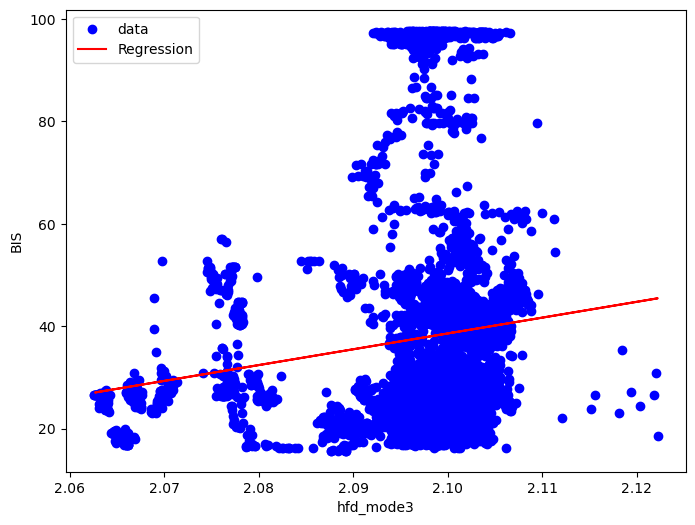

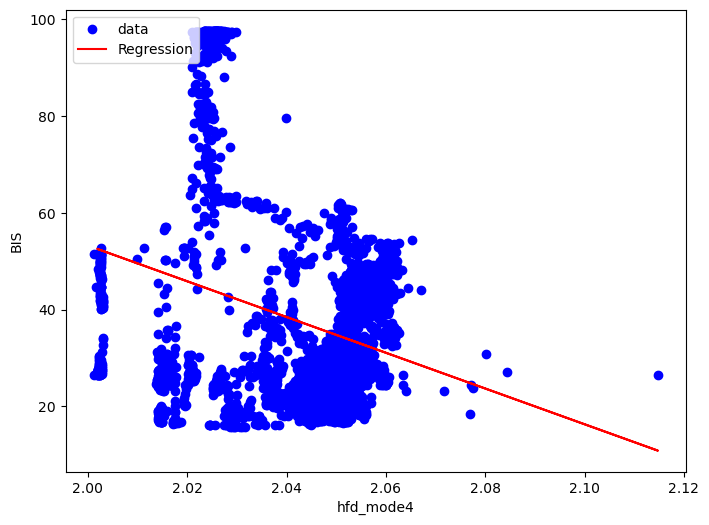

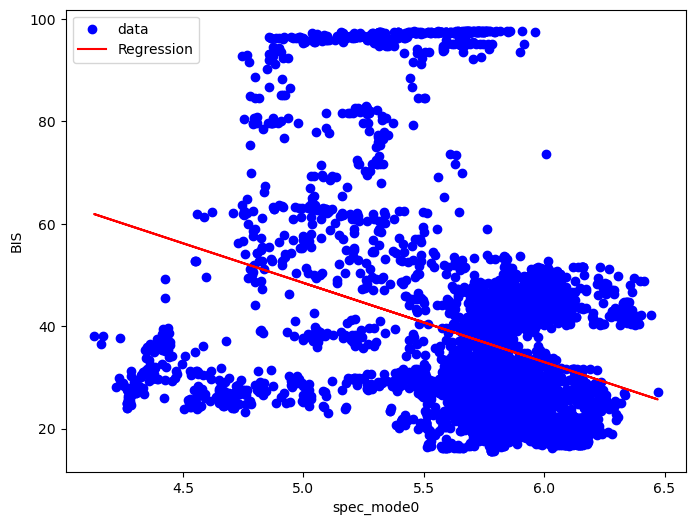

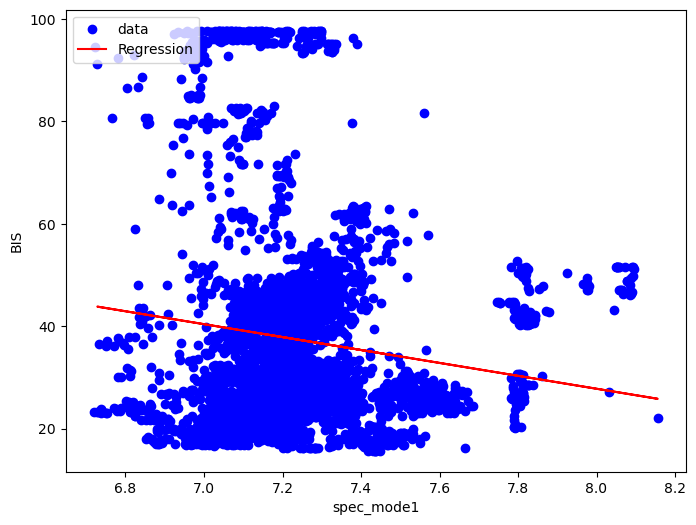

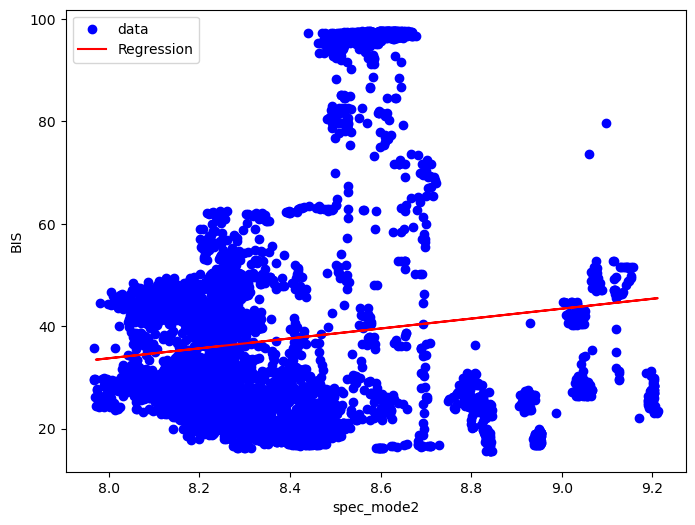

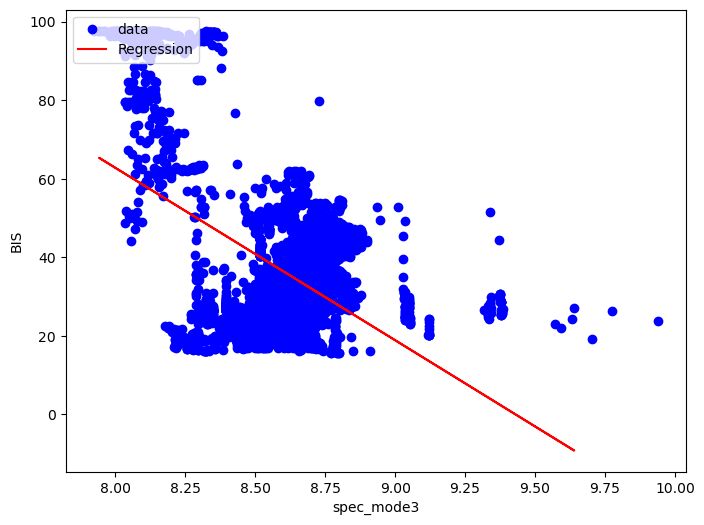

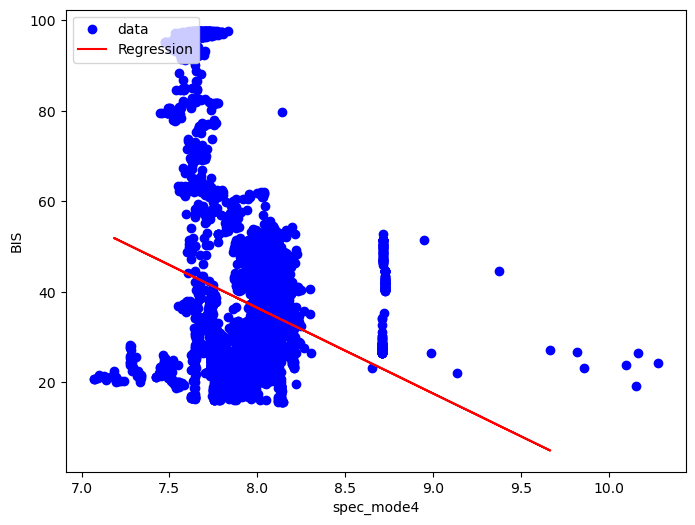

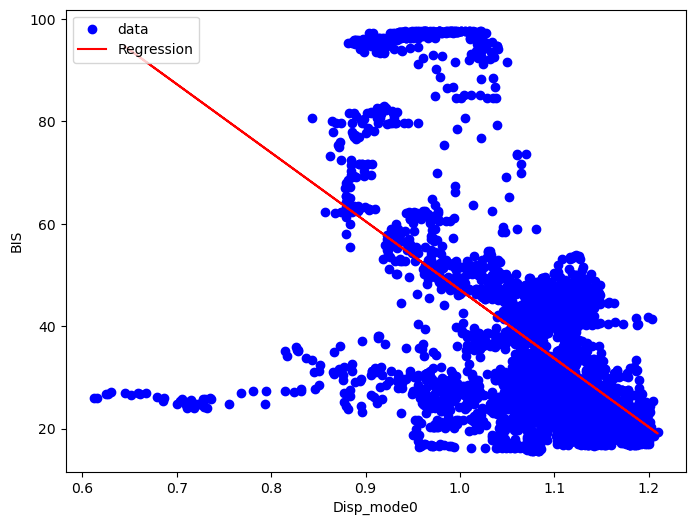

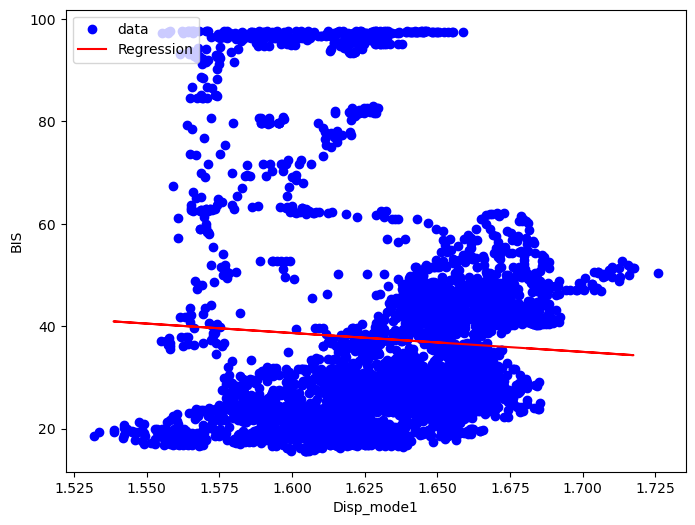

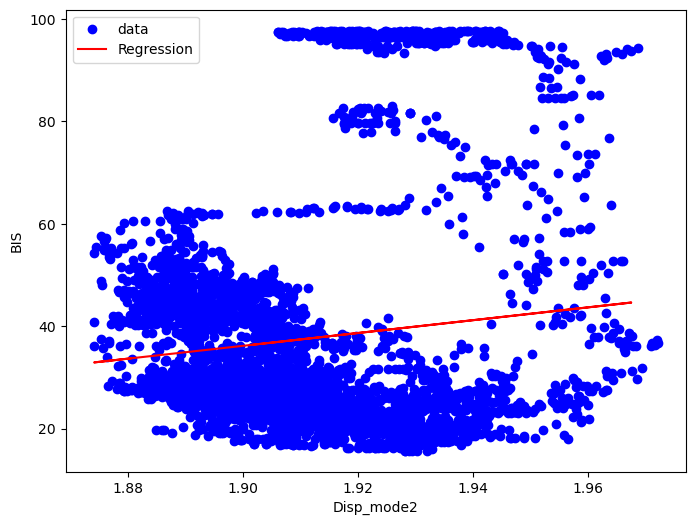

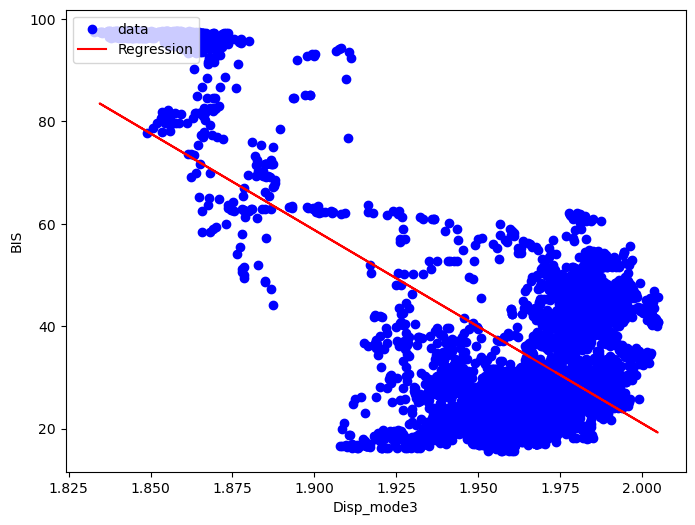

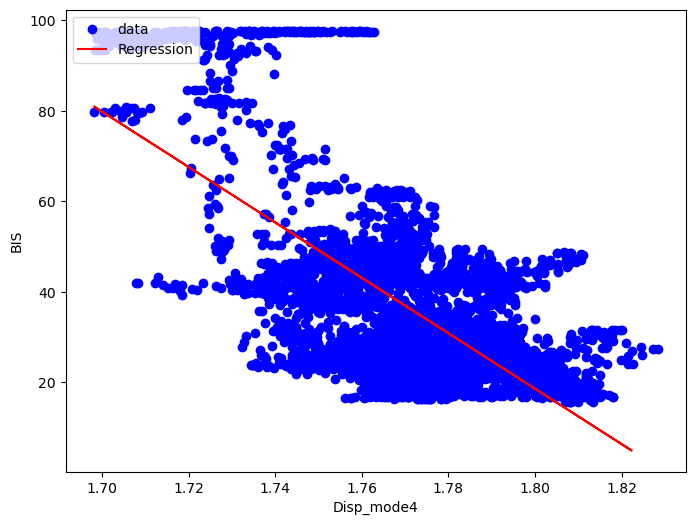

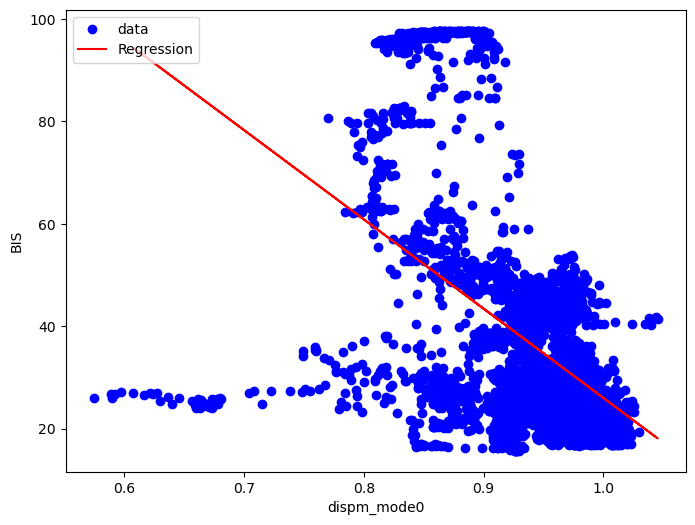

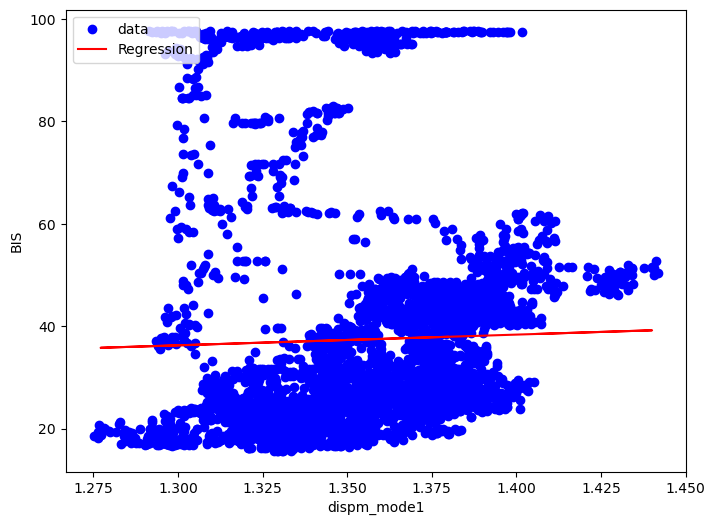

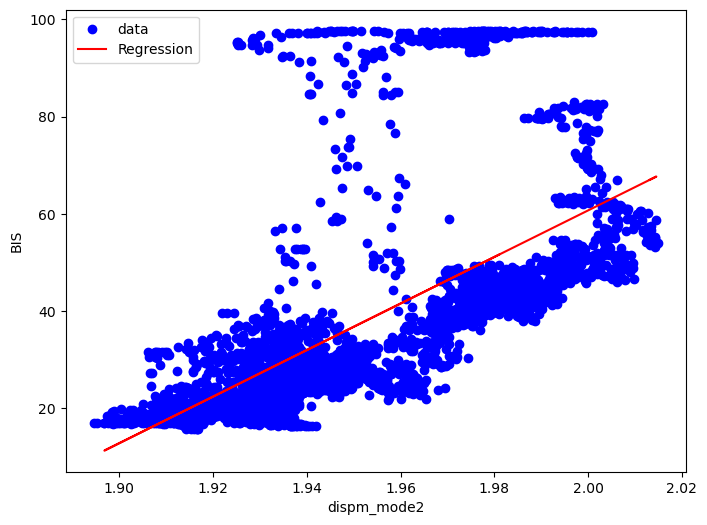

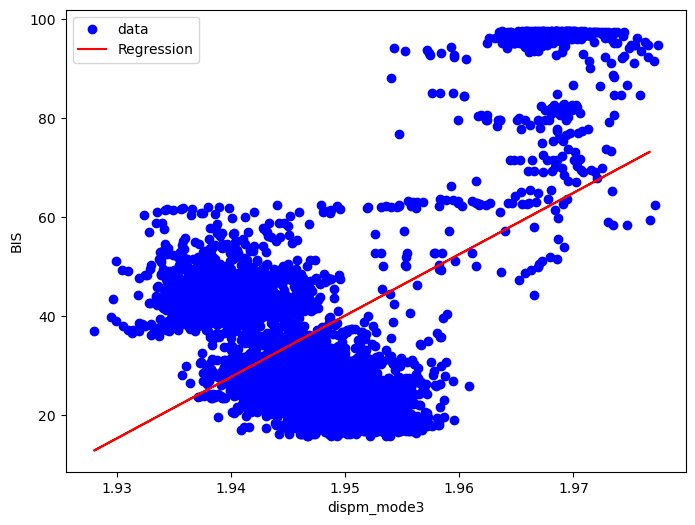

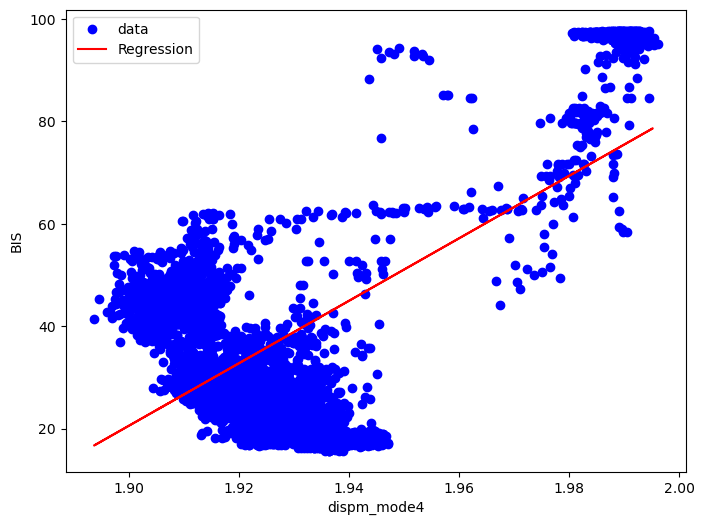

In [6]:

for column in patient.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
27,pet_mode2_r2,73.344598
22,Perment_mode2_r2,73.272580
33,lzc_mode3_r2,70.817700
34,lzc_mode4_r2,68.334964
54,Disp_mode4_r2,47.156834
21,Perment_mode1_r2,45.487573
26,pet_mode1_r2,45.371810
53,Disp_mode3_r2,45.218158
57,dispm_mode2_r2,41.110043
59,dispm_mode4_r2,39.207269


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
33      lzc_mode3    0.683108
57    dispm_mode2    0.175648
34      lzc_mode4    0.056660
7        hc_mode2    0.027878
15     detf_mode0    0.004874
32      lzc_mode2    0.004279
31      lzc_mode1    0.003761
52     Disp_mode2    0.002974
36      svd_mode1    0.002748
21  Perment_mode1    0.002347
0        hm_mode0    0.002110
38      svd_mode3    0.001718
42      hfd_mode2    0.001619
5        hc_mode0    0.001521
8        hc_mode3    0.001443
54     Disp_mode4    0.001334
3        hm_mode3    0.001322
35      svd_mode0    0.001215
49     spec_mode4    0.001103
37      svd_mode2    0.001049
4        hm_mode4    0.000990
29      pet_mode4    0.000967
43      hfd_mode3    0.000966
16     detf_mode1    0.000859
39      svd_mode4    0.000803
41      hfd_mode1    0.000774
30      lzc_mode0    0.000759
53     Disp_mode3    0.000755
40      hfd_mode0    0.000753
24  Perment_mode4    0.000710
58    dispm_mode3    0.000691
2        hm_mode2    0.000663
26      pe